In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [2]:
base_dir = "./Jute_Pest_Dataset"  
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

In [3]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="sparse"
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="sparse"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="sparse"
)

# Get the number of classes
num_classes = len(train_data.class_indices)
print(f"Number of classes: {num_classes}")

Found 6443 images belonging to 17 classes.
Found 413 images belonging to 17 classes.
Found 379 images belonging to 17 classes.
Number of classes: 17


In [4]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(17, activation='softmax')
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,394,513 (28.21 MB)

 Trainable params: 7,394,513 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


202/202 ━━━━━━━━━━━━━━━━━━━━ 103s 493ms/step - accuracy: 0.1134 - loss: 3.0402 - val_accuracy: 0.3293 - val_loss: 2.2811
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 51s 249ms/step - accuracy: 0.2808 - loss: 2.2830 - val_accuracy: 0.3632 - val_loss: 2.1406
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 54s 267ms/step - accuracy: 0.4001 - loss: 1.9018 - val_accuracy: 0.4988 - val_loss: 1.9565
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 50s 245ms/step - accuracy: 0.5399 - loss: 1.4901 - val_accuracy: 0.5303 - val_loss: 1.7310
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 48s 235ms/step - accuracy: 0.6432 - loss: 1.1403 - val_accuracy: 0.5521 - val_loss: 1.7344
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 48s 235ms/step - accuracy: 0.7035 - loss: 0.9213 - val_accuracy: 0.5424 - val_loss: 1.8224
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 47s 233ms/step - accuracy: 0.7779 - loss: 0.7291 - val_accuracy: 0.5400 - val_loss: 1.8951
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 52s 254ms/step - accuracy: 0.8202 - loss: 0.5800 - va

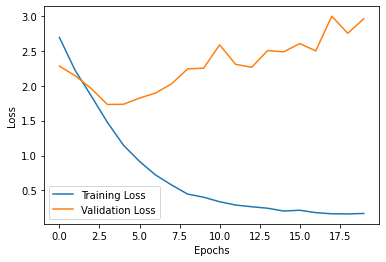

In [7]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

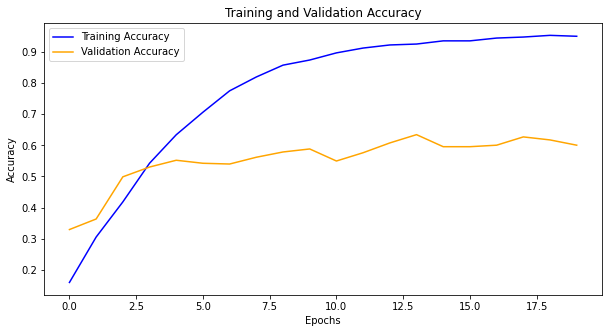

In [8]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [9]:
# Generate classification report and confusion matrix
test_data.reset()
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes

# Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(y_true, y_pred))

# Classification Report
print("\nClassification Report")
print(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys()))

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 373ms/step
Confusion Matrix
[[1 0 0 1 3 3 0 1 2 3 0 1 1 1 1 2 0]
 [0 0 1 1 1 0 2 2 2 7 0 2 0 0 0 1 1]
 [0 1 0 1 3 0 2 0 1 3 1 2 1 1 0 3 1]
 [0 2 0 1 2 0 2 5 1 1 1 0 2 0 0 1 2]
 [0 2 0 2 5 1 2 1 1 4 0 0 0 0 0 4 0]
 [0 0 2 0 2 0 4 2 0 4 0 1 2 0 0 2 1]
 [1 2 2 0 1 0 5 0 0 4 0 2 1 1 2 0 3]
 [0 0 2 2 3 1 0 1 2 2 2 0 0 1 3 1 1]
 [0 4 0 2 1 0 2 1 0 6 1 2 0 0 1 1 3]
 [0 0 0 1 4 2 2 2 1 4 1 1 2 1 2 1 0]
 [1 2 0 1 3 1 0 1 1 8 1 0 1 1 0 1 2]
 [0 2 1 0 3 1 0 2 1 4 0 2 2 0 2 1 3]
 [0 1 0 2 0 1 5 1 1 2 1 2 3 1 1 2 1]
 [1 0 0 3 6 4 3 0 3 3 0 1 0 0 0 0 0]
 [0 1 0 1 2 0 2 1 0 0 1 3 1 1 2 3 2]
 [2 2 2 2 2 3 0 1 0 6 0 1 0 1 1 0 1]
 [0 4 2 1 3 2 1 1 1 3 1 0 0 1 2 1 1]]

Classification Report
                               precision    recall  f1-score   support

                Beet Armyworm       0.17      0.05      0.08        20
                  Black Hairy       0.00      0.00      0.00        20
                      Cutworm       0.00      0.00      0.00        20
    